# simple regression with tensorflow
https://medium.com/@saxenarohan97/intro-to-tensorflow-solving-a-simple-regression-problem-e87b42fd4845#.utyupe57m

In [1]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

In [13]:
# Get the data: 13 features 
total_features, total_prices = load_boston(True) # features and prices in separate numpy arrays.
print('test_features=',total_features.shape)
print('total_prices=',total_prices.shape)
print('total_prices[0]=',total_features[0])
print('total_prices[0]=',total_prices[0])

# Keep 300 samples for training
train_features = scale(total_features[:300])
train_prices = total_prices[:300]
print('after scale=',train_features[0])

# Keep 100 samples for validation
valid_features = scale(total_features[300:400])
valid_prices = total_prices[300:400]

# Keep remaining samples as test set
test_features = scale(total_features[400:])
test_prices = total_prices[400:]


('test_features=', (506, 13))
('total_prices=', (506,))
('total_prices[0]=', array([  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
         0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
         6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
         2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
         4.98000000e+00]))
('total_prices[0]=', 24.0)
('after scale=', array([-0.64113113,  0.10080399, -1.03067021, -0.31448545,  0.217757  ,
        0.21942717,  0.08260981, -0.09559716, -2.15826599, -0.23254428,
       -1.00268807,  0.42054571, -0.92348369]))


In [14]:
w = tf.Variable(tf.truncated_normal([13, 1], mean=0.0, stddev=1.0, dtype=tf.float64))
b = tf.Variable(tf.zeros(1, dtype = tf.float64))

In [16]:
def calc(x, y):
    # Returns predictions and error
    predictions = tf.add(b, tf.matmul(x, w))
    error = tf.reduce_mean(tf.square(y - predictions))
    return [ predictions, error ]

In [17]:
y, cost = calc(train_features, train_prices)
# Feel free to tweak these 2 values:
learning_rate = 0.025
epochs = 3000
points = [[], []] # points[0]=n of iteration, points[1]=cost

In [18]:
init = tf.initialize_all_variables()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

('cost=', 671.10848310372535)
('cost=', 78.894827099887095)
('cost=', 78.75858099238026)
('cost=', 78.733889972594696)
('cost=', 78.727675949039494)
('cost=', 78.725983544465223)
('cost=', 78.72550060190359)
('cost=', 78.725358841516822)
('cost=', 78.725316528572364)
('cost=', 78.725303776224536)
('cost=', 78.725299911670703)
('cost=', 78.725298736882522)
('cost=', 78.725298379134657)
('cost=', 78.7252982700834)
('cost=', 78.725298236824699)
('cost=', 78.725298226678035)
('cost=', 78.725298223580964)
('cost=', 78.725298222637761)
('cost=', 78.725298222348997)
('cost=', 78.725298222261955)
('cost=', 78.725298222233846)
('cost=', 78.725298222226215)
('cost=', 78.725298222223159)
('cost=', 78.725298222221767)
('cost=', 78.725298222222165)
('cost=', 78.725298222222548)
('cost=', 78.725298222222278)
('cost=', 78.725298222221966)
('cost=', 78.725298222222506)
('cost=', 78.725298222221994)


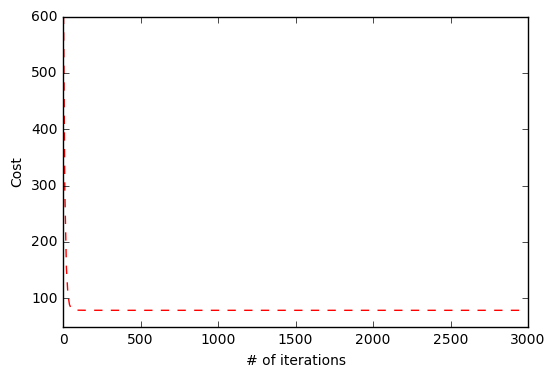

('Validation pred =', array([[ 25.48466665],
       [ 25.48466665],
       [ 25.48466665],
       [ 25.48466665],
       [ 25.48466666],
       [ 25.48466665],
       [ 25.48466665],
       [ 25.48466665],
       [ 25.48466667],
       [ 25.48466666],
       [ 25.48466666],
       [ 25.48466666],
       [ 25.48466666],
       [ 25.48466666],
       [ 25.48466667],
       [ 25.48466666],
       [ 25.48466666],
       [ 25.48466667],
       [ 25.48466667],
       [ 25.48466667],
       [ 25.48466667],
       [ 25.48466667],
       [ 25.48466666],
       [ 25.48466666],
       [ 25.48466667],
       [ 25.48466667],
       [ 25.48466667],
       [ 25.48466667],
       [ 25.48466666],
       [ 25.48466666],
       [ 25.48466666],
       [ 25.48466665],
       [ 25.48466666],
       [ 25.48466668],
       [ 25.48466668],
       [ 25.48466668],
       [ 25.48466667],
       [ 25.48466667],
       [ 25.48466667],
       [ 25.48466667],
       [ 25.48466667],
       [ 25.48466666],
       [ 25.

In [19]:
with tf.Session() as sess:

    sess.run(init)

    for i in list(range(epochs)):

        sess.run(optimizer)

        if i % 10 == 0.:
            points[0].append(i+1)
            points[1].append(sess.run(cost))

        if i % 100 == 0:
            print('cost=',sess.run(cost))

    plt.plot(points[0], points[1], 'r--')
    plt.axis([0, epochs, 50, 600])
    plt.xlabel('# of iterations')
    plt.ylabel('Cost')
    plt.show()

    valid_pred, valid_cost = calc(valid_features, valid_prices)
    print('Validation pred =', sess.run(valid_pred), '\n')
    print('Validation error =', sess.run(valid_cost), '\n')

    test_pred, test_cost = calc(test_features, test_prices)
    print('Test pred =', sess.run(test_pred), '\n')
    print('Test error =', sess.run(test_cost), '\n')

 

In [ ]:
# tflearn

tflearn.regression